In [1]:
wifi <- data.frame(
  location = c("Nest","Nest","AERL","AERL",
               "Nest","Nest","AERL","AERL"),
  time = c("Morning","Morning","Morning","Morning",
           "Afternoon","Afternoon","Afternoon","Afternoon"),
  device = c("Laptop","Phone","Laptop","Phone",
             "Laptop","Phone","Laptop","Phone"),
  speed = c(75.1, 86.2, 295, 129, 238, 147, 237, 217))

wifi$location <- factor(wifi$location)
wifi$time     <- factor(wifi$time)
wifi$device   <- factor(wifi$device)   

wifi

location,time,device,speed
<fct>,<fct>,<fct>,<dbl>
Nest,Morning,Laptop,75.1
Nest,Morning,Phone,86.2
AERL,Morning,Laptop,295.0
AERL,Morning,Phone,129.0
Nest,Afternoon,Laptop,238.0
Nest,Afternoon,Phone,147.0
AERL,Afternoon,Laptop,237.0
AERL,Afternoon,Phone,217.0


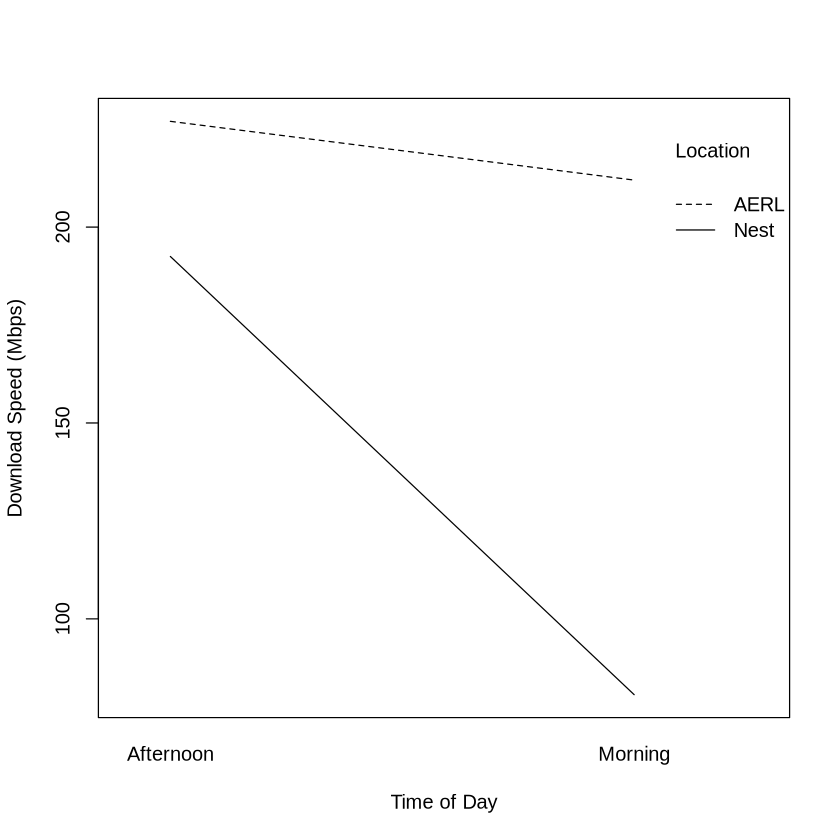

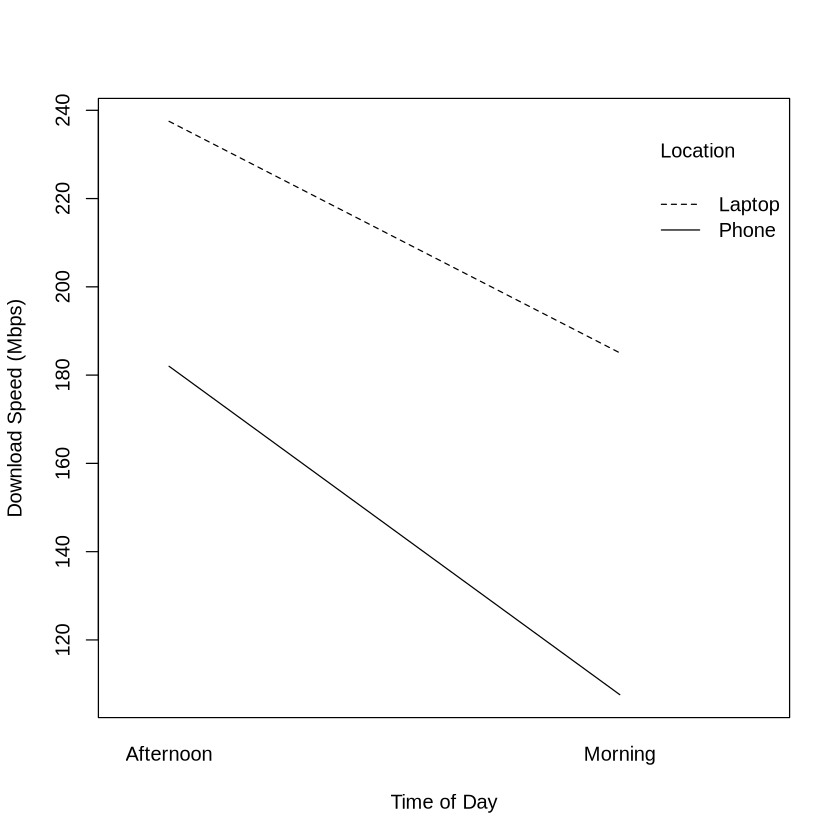

In [2]:
interaction.plot(wifi$time, wifi$location, wifi$speed,
                 xlab="Time of Day", trace.label="Location",
                 ylab="Download Speed (Mbps)")

interaction.plot(wifi$time, wifi$device, wifi$speed,
                 xlab="Time of Day", trace.label="Location",
                 ylab="Download Speed (Mbps)")

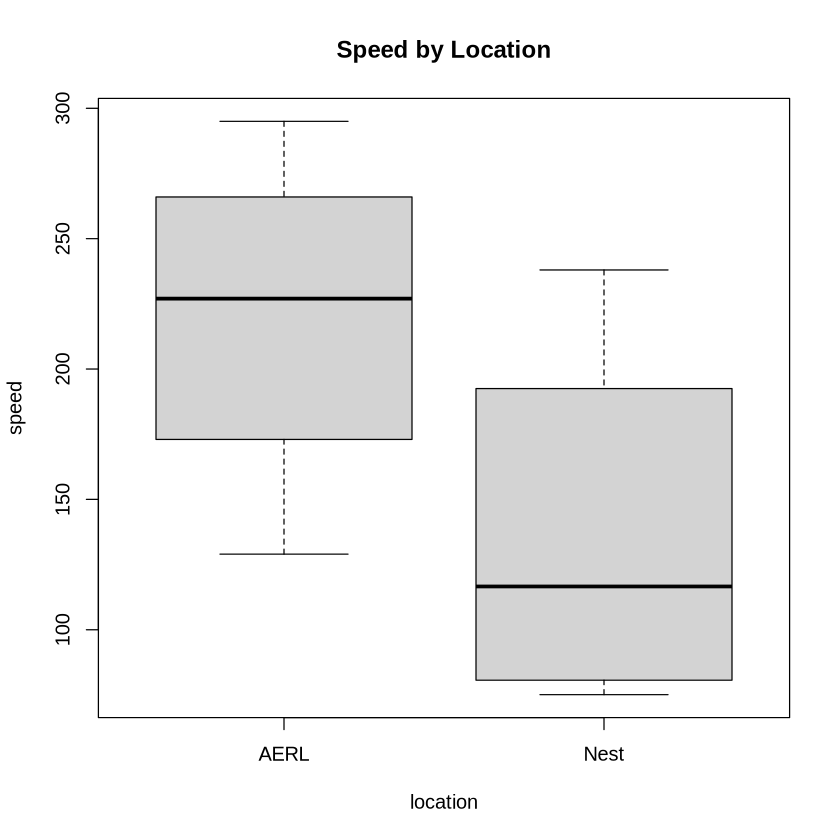

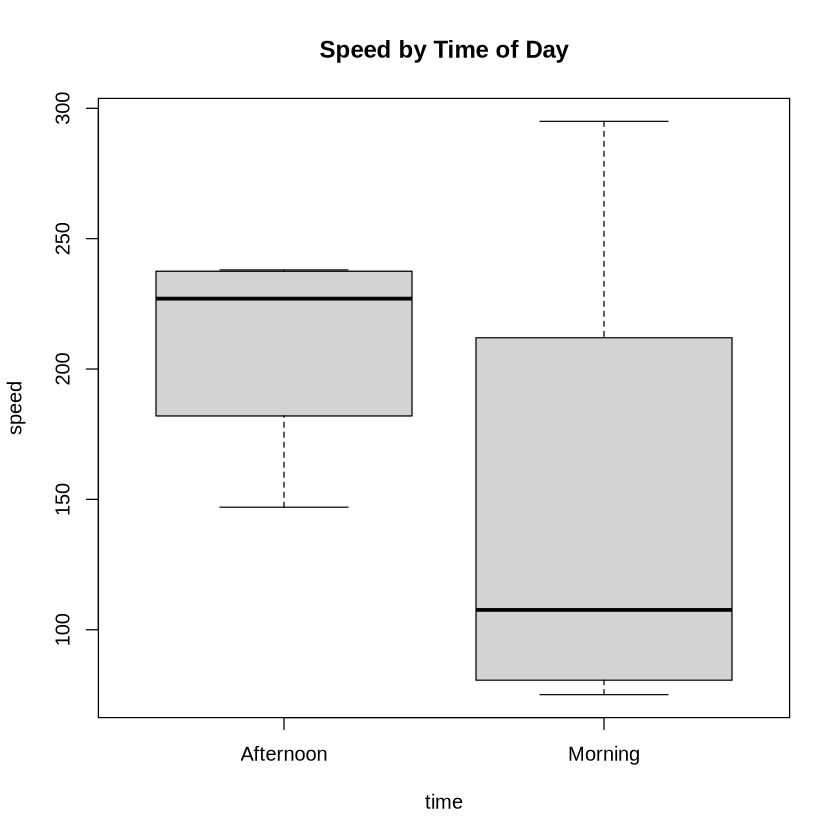

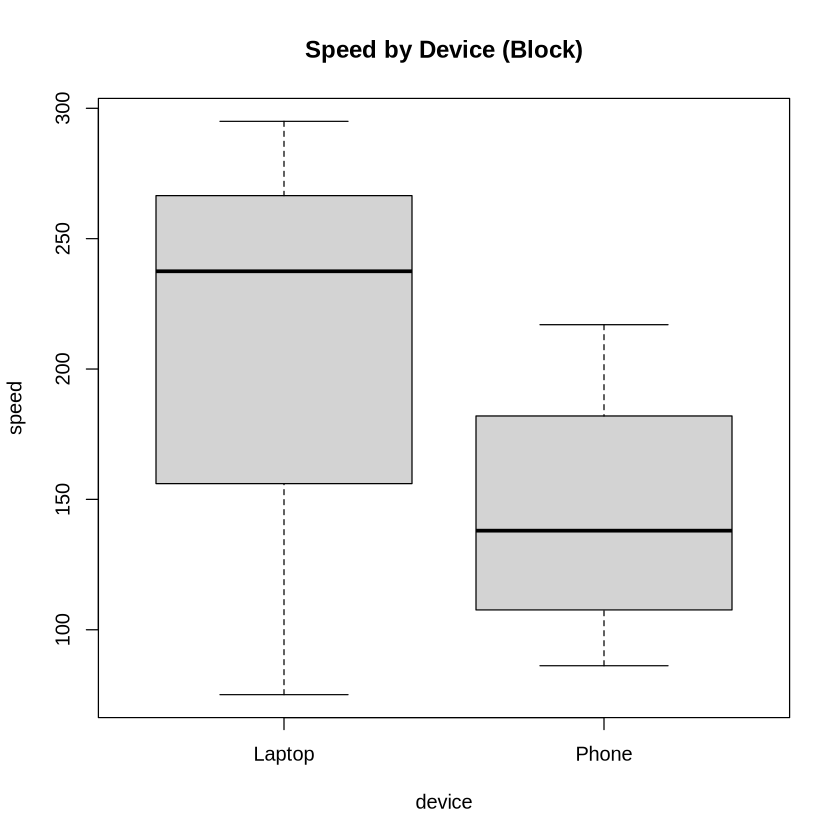

In [3]:
boxplot(speed ~ location, data = wifi,
        main="Speed by Location")

boxplot(speed ~ time, data = wifi,
        main="Speed by Time of Day")

boxplot(speed ~ device, data = wifi,
        main="Speed by Device (Block)")

In [4]:
main <- lm(speed ~ location + time + device, data = wifi)
summary(main)

full <- lm(speed ~ location * time + device, data = wifi)
summary(full)


Call:
lm(formula = speed ~ location + time + device, data = wifi)

Residuals:
      1       2       3       4       5       6       7       8 
-63.000  14.575  73.975 -25.550  36.475  11.950 -47.450  -0.975 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)    284.45      41.88   6.792  0.00245 **
locationNest   -82.93      41.88  -1.980  0.11880   
timeMorning    -63.43      41.88  -1.514  0.20449   
devicePhone    -66.47      41.88  -1.587  0.18765   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 59.23 on 4 degrees of freedom
Multiple R-squared:  0.6859,	Adjusted R-squared:  0.4503 
F-statistic: 2.911 on 3 and 4 DF,  p-value: 0.1643



Call:
lm(formula = speed ~ location * time + device, data = wifi)

Residuals:
     1      2      3      4      5      6      7      8 
-38.79  38.79  49.76 -49.76  12.26 -12.26 -23.24  23.24 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)                260.24      44.12   5.899  0.00973 **
locationNest               -34.50      55.80  -0.618  0.58018   
timeMorning                -15.00      55.80  -0.269  0.80551   
devicePhone                -66.47      39.46  -1.685  0.19065   
locationNest:timeMorning   -96.85      78.92  -1.227  0.30726   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 55.8 on 3 degrees of freedom
Multiple R-squared:  0.7909,	Adjusted R-squared:  0.512 
F-statistic: 2.836 on 4 and 3 DF,  p-value: 0.2091


[1] -0.5454545


Call:
lm(formula = speed_transformed ~ wifi$location * wifi$time + 
    wifi$device)

Residuals:
        1         2         3         4         5         6         7         8 
-0.018366  0.018366  0.019142 -0.019142  0.006977 -0.006977 -0.007753  0.007753 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         1.87784    0.01840 102.057 2.07e-06 ***
wifi$locationNest                  -0.01446    0.02327  -0.621    0.578    
wifi$timeMorning                   -0.01343    0.02327  -0.577    0.604    
wifi$devicePhone                   -0.02136    0.01646  -1.298    0.285    
wifi$locationNest:wifi$timeMorning -0.06238    0.03291  -1.895    0.154    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02327 on 3 degrees of freedom
Multiple R-squared:  0.8713,	Adjusted R-squared:  0.6998 
F-statistic: 5.079 on 4 and 3 DF,  p-value: 0.1065



Call:
lm(formula = speed ~ location * time + device, data = wifi)

Residuals:
     1      2      3      4      5      6      7      8 
-38.79  38.79  49.76 -49.76  12.26 -12.26 -23.24  23.24 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)                260.24      44.12   5.899  0.00973 **
locationNest               -34.50      55.80  -0.618  0.58018   
timeMorning                -15.00      55.80  -0.269  0.80551   
devicePhone                -66.47      39.46  -1.685  0.19065   
locationNest:timeMorning   -96.85      78.92  -1.227  0.30726   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 55.8 on 3 degrees of freedom
Multiple R-squared:  0.7909,	Adjusted R-squared:  0.512 
F-statistic: 2.836 on 4 and 3 DF,  p-value: 0.2091


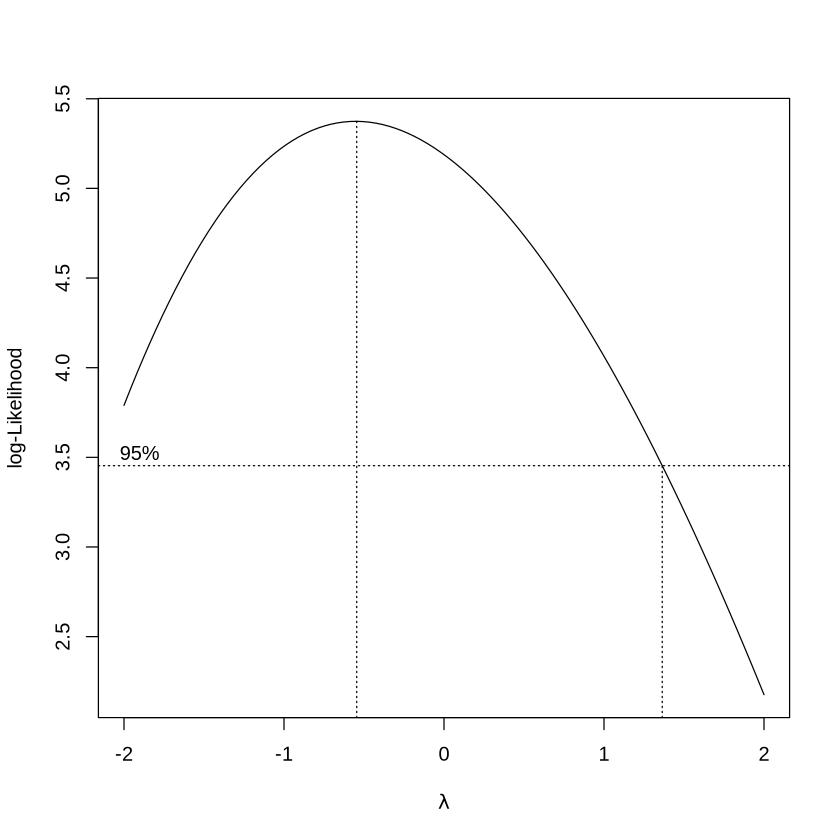

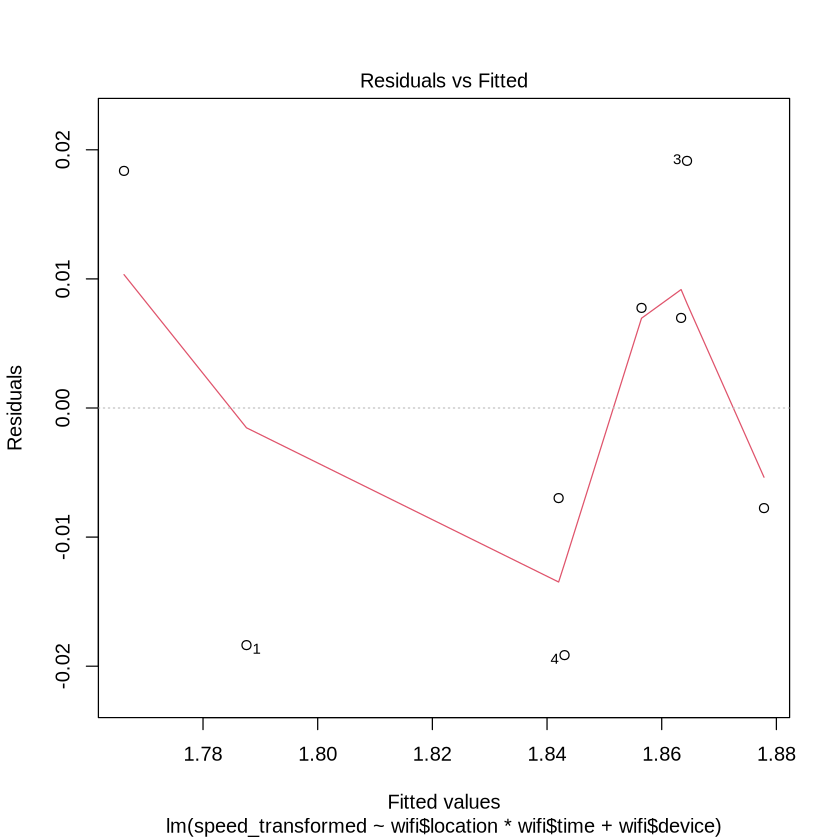

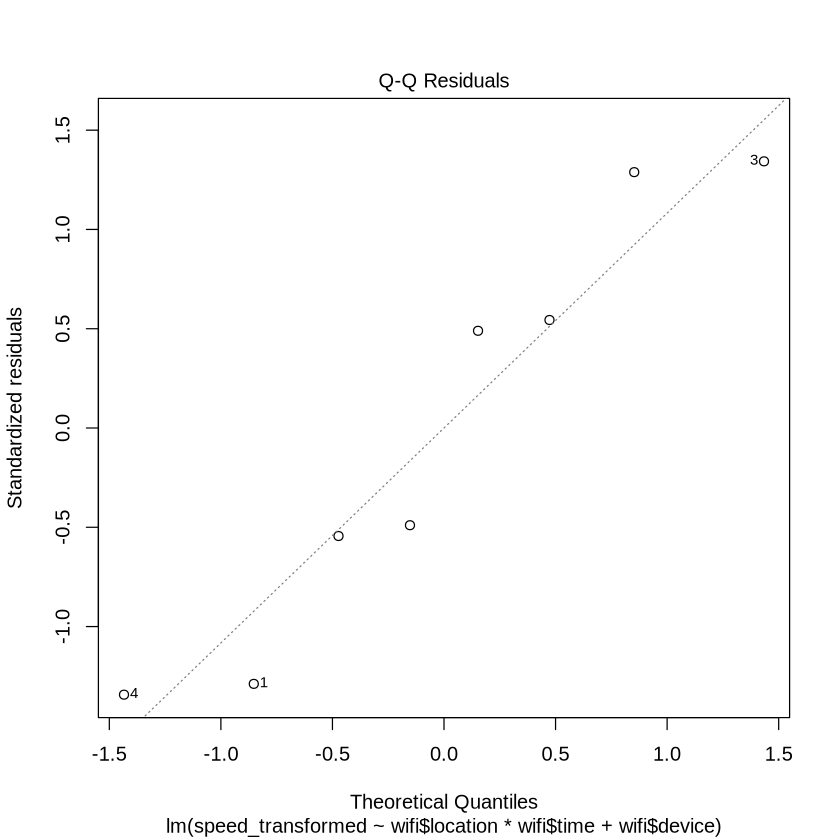

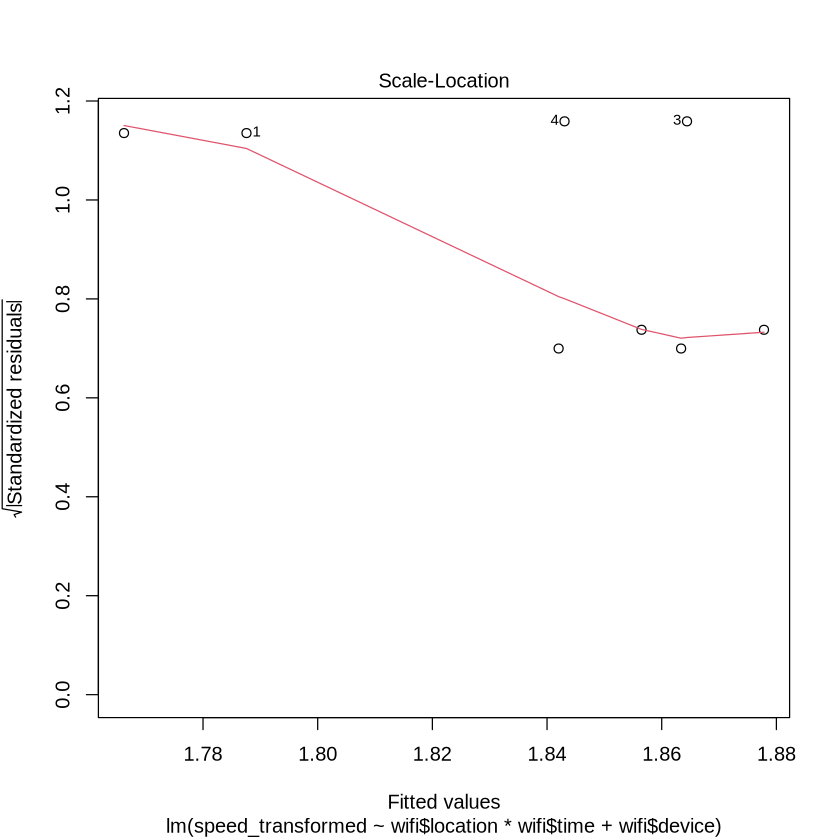

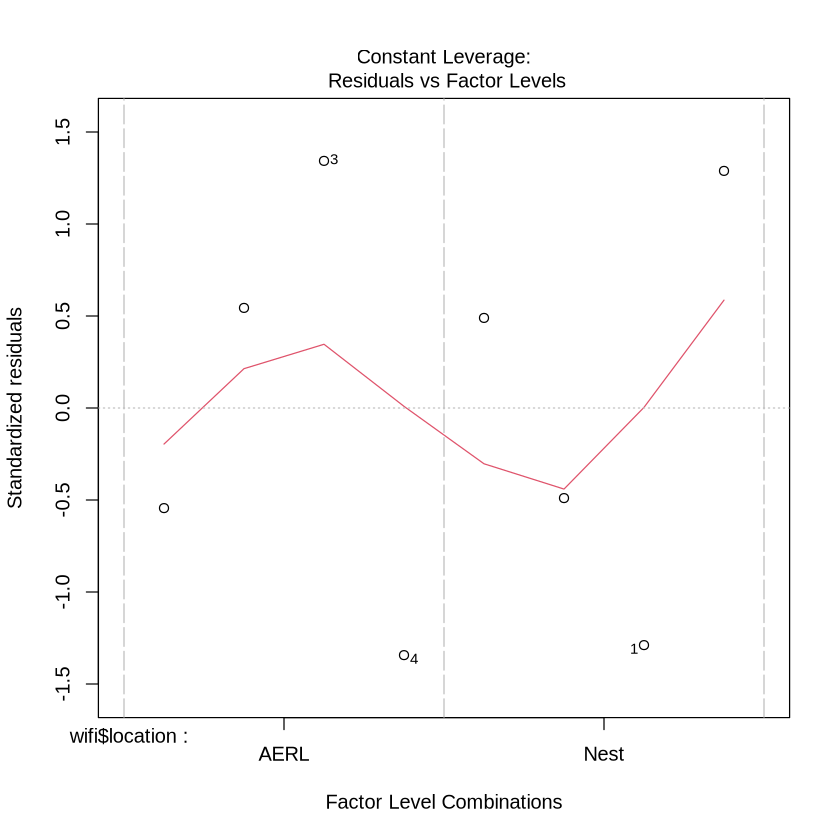

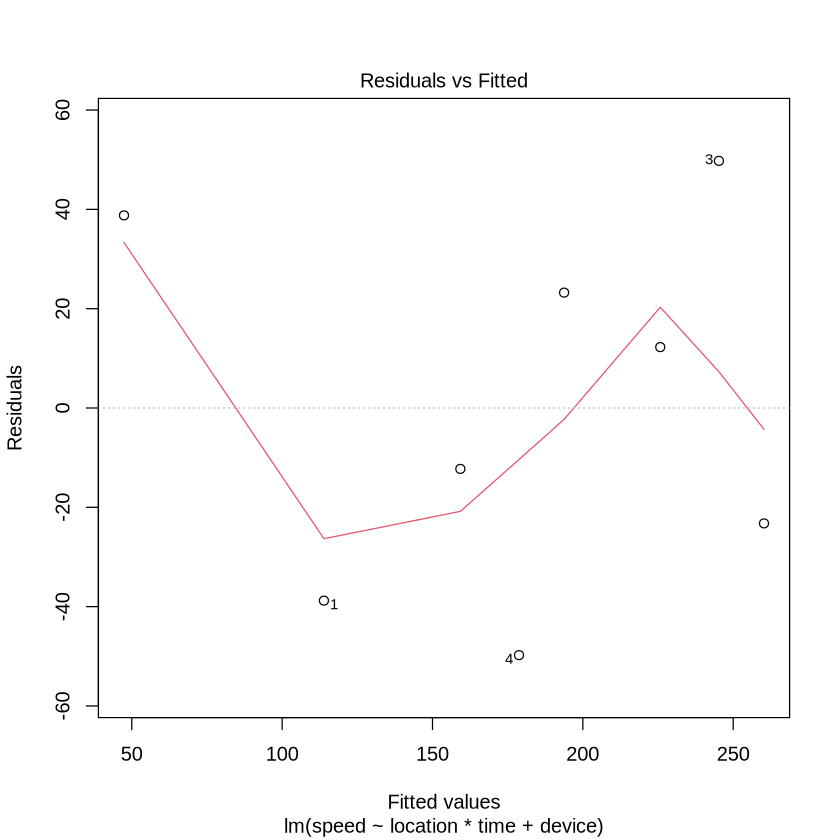

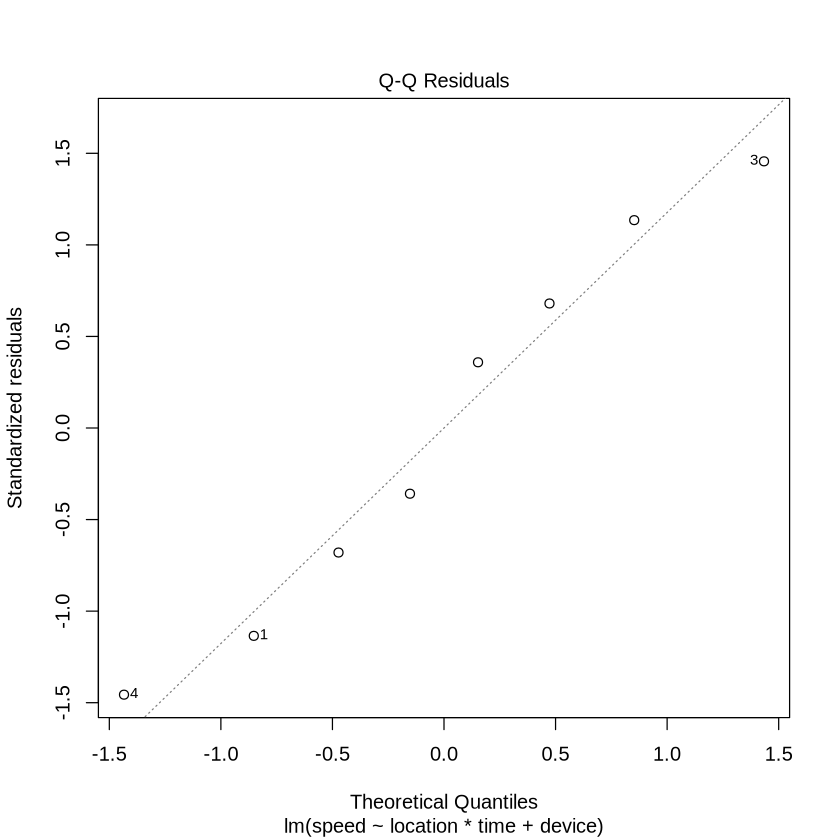

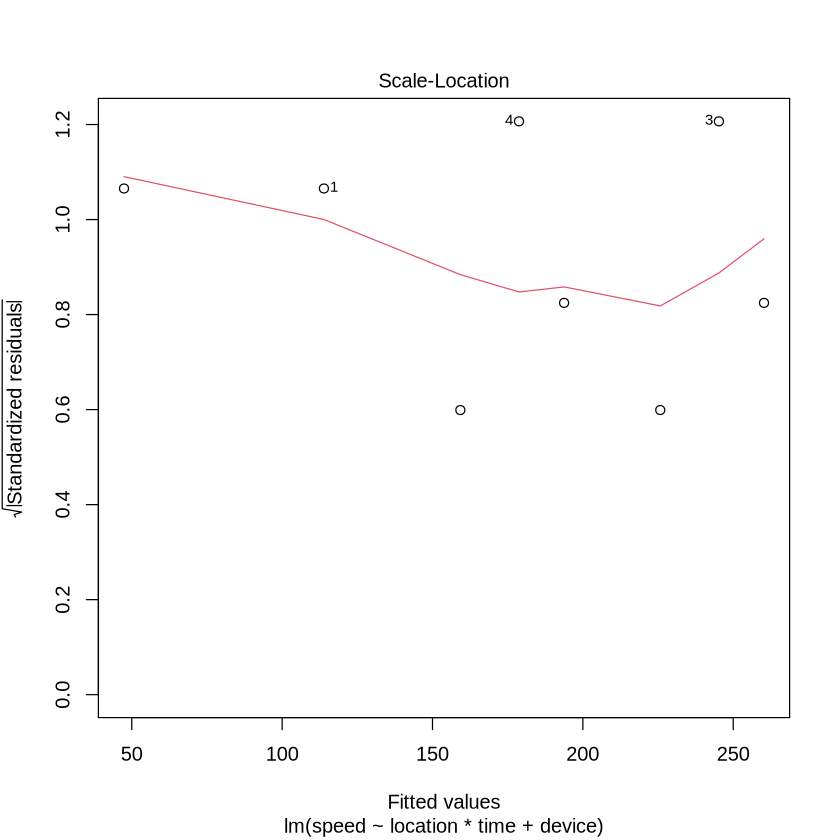

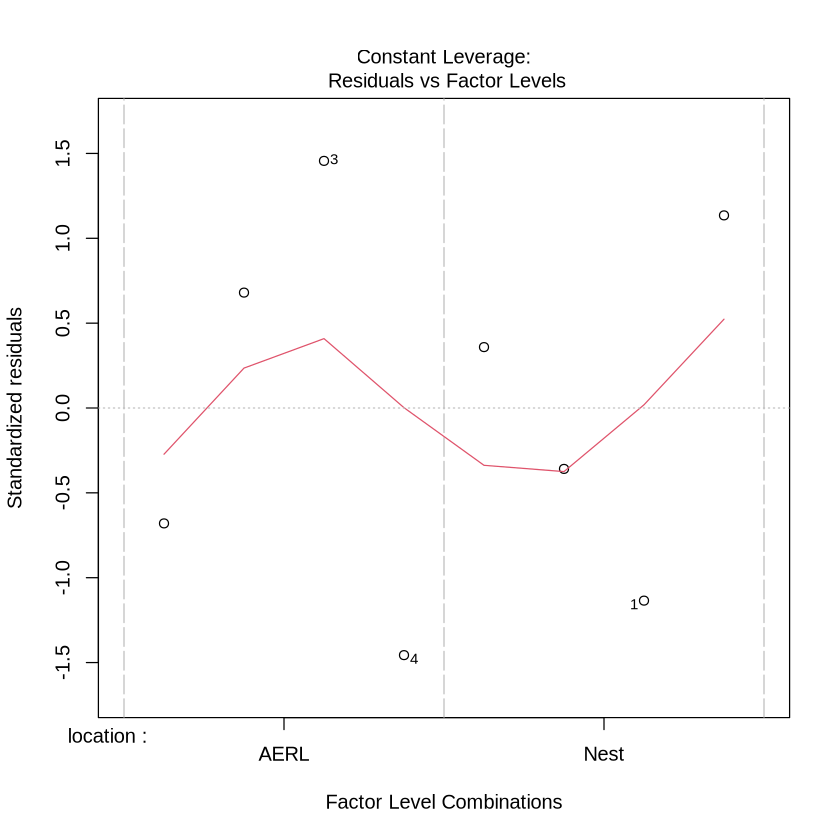

In [9]:
library(MASS)
bc_result <- boxcox(full, plotit = TRUE)
lambda_optimal <- bc_result$x[which.max(bc_result$y)]
lambda_optimal

speed_transformed <- (wifi$speed^-0.5 - 1) / -0.5
full_transformed <- lm(speed_transformed ~ wifi$location * wifi$time + wifi$device)

summary(full_transformed)
summary(full)

plot(full_transformed)
plot(full)

The box-cox analysis suggests that the optimal value of $\lambda$ is approximately $-0.55$, which can be approximated to a transformation of the negative square root of the response. With the transformed model, we can see small improvements in the diagnostic plots, with the QQ-plot more closely resembling the bisect line and slightly more scatter in the residual-fitted plot.

In [5]:
anova <- aov(speed ~ location * time + device, data = wifi)
summary(anova)

              Df Sum Sq Mean Sq F value Pr(>F)
location       1  13753   13753   4.416  0.126
time           1   8045    8045   2.584  0.206
device         1   8838    8838   2.838  0.191
location:time  1   4690    4690   1.506  0.307
Residuals      3   9342    3114               

Based on the ANOVA table above, none of the terms in the model appear to be significant, including the interaction term between treatment factors (location and time of day). This suggests that none of the factors tested - location, time of day, or device used - have a statistically significant effect on the download speed of ubcsecure.